# <center>HW5</center> #
####  107061112 王昊文
***
## <u>Question 1</u>
Use the Fashion MNIST dataset (https://www.kaggle.com/zalando-research/fashionmnist)to develop classi cation for clothing. Please provide enough information for the model development and testing. For example

1. Preprocessing of dataset (categorical data handling, dataset partitioning, feature scaling, ...

2. Why you choose the algorithm/model to develop? How do you select the parameters and what the optimal parameters are

3. Performance (what kinds of evaluation metrics) of the model you developed

4. Computation complexity analysis for your proposed model.


## Implementation

1. 使用Pandas處理資料，觀察資料的特性，查看是否需要做額外的處理
2. 我會使用傳統Machine Learning方法以及使用keras這個api來做一些簡單的MLP或Convolution來測試看看，哪些的效能比較好？
3. 比較各種配置的Convolution，究竟是淺的網路還是深的網路表現比較好，並將Model答錯的圖片印出來看發生什麼事情。
4. 最後根據效能，以及複雜度，還有硬體的吃緊程度，去做最後判斷哪個方法最適合這個Task。
5. 最後使用Augmented data拿去我們得到最強的Model給它，看看可不可以提昇準確率。


## Data preprocess

### Read in the dataset

In [135]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv',)
print('Test and train data loaded sucessfully!')

Test and train data loaded sucessfully!


### Explore the data
在這裡我們會將資料的一些特性印出來，然後我們最後再來判斷是否需要做特殊的處理。

In [136]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [138]:
print(train_df.info())
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [139]:
print(test_df.info())
test_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
None


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


根據上面的資訊，我們可以發現我們的資料相當的大，Training set可以吃掉300mb的記憶體空間。另外我們可以發現我們圖片資料相當的sparse，大部分都是0，然後範圍是0~255，維度為784維，如果使用傳統Machine learning的演算法可能需要做降維，然而降維我們很可能犧牲掉很大的準確率，這部份的取捨我們到後面再來討論。
接著，我們資料label皆已經做好處理了，Test與Train也都分好了，我們唯一需要做的處理就是根據我們的演算法去做標準化。

### Split data into X and y

In [140]:
# Make the training set between 0 to 1 to make optimizer stable
X_train = np.array(train_df.iloc[:,1:])
y_train = np.array(train_df.iloc[:,0])
# same here
X_test = np.array(test_df.iloc[:,1:])
y_test = np.array(test_df.iloc[:,0])

print('size of our training set:', X_train.shape[0])
print('size of our testing set:', X_test.shape[0])

size of our training set: 60000
size of our testing set: 10000


### Observe unique labels in y

In [141]:
unique, counts = np.unique(y_train, return_counts=True)
print("Unique y_train", dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print("Unique y_test", dict(zip(unique, counts)))

Unique y_train {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}
Unique y_test {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


從這邊我們可以發現我們的Dataset的Label相當均勻，不需要做任何Sampling的調整

### Visualize samples of our dataset
由於我們Datset為數字檔，我很好奇如果把裡面的數字轉換成圖片會長什麼樣子，於是我做了下面的Visualization

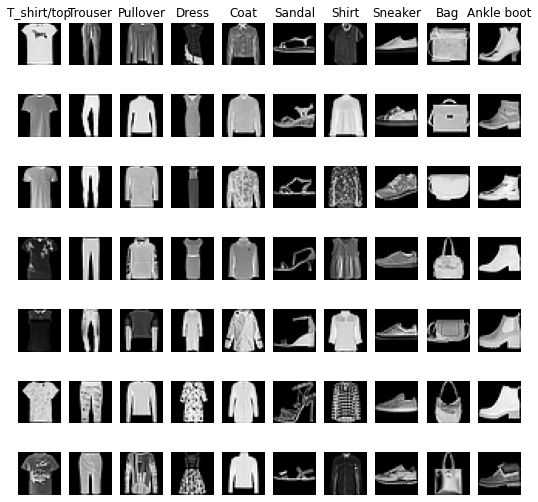

In [142]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(class_names)
samples_per_class = 7
plt.figure(figsize=(9, 9))
for y, cls in enumerate(class_names):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace = False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)

plt.show()


我們使用黑白的來重現，我們可以看到，因為Dataset解析度不高，從這邊來看，我認為T-shirt、pullover、Coat、shirt這幾個Class，感覺會是對電腦來說相當難的，畢竟連人都很可能認錯。另外Boot以及Sneaker也是潛在可能的Hard case。

## Use Machine learning methods
首先，我們先不要使用深層網路，使用傳統的Machine learning方法，試試看我們的效果如何。我會挑選Random Forest，以及SGD的linear SVM以及Logistic regression，並比較其效能。我們使用SGD的理由正是因為我們的Training set實在是太大，如果不使用SGD，第一，效率差，第二，我們級有可能卡在Local Minimum導致Learning的困難。第三是關於Cross Validation的部份，因為我們的資料過大，不使用SGD的情況，Cross Validation將花上非常久的時間，這邊因為我沒有運算資源，因此我只使用SGD。

最後關於KNN的部份，因為它實在是太吃記憶體我的電腦記憶體又很小，我在Training的時候電腦直接出現Segmentation fault，記憶體不足。因此我其實可以做降維或將Training set縮小，但看在有更好的方法，我這邊就不使用KNN了。

### Random forest
Random forest算是線性分類器裡面最強大的Model，我們測試一下他的效能如何。

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

forest = RandomForestClassifier(criterion='gini', n_estimators=20, random_state=1, n_jobs=-1, max_depth=10)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=20, n_jobs=-1, random_state=1)

#### Learning curve

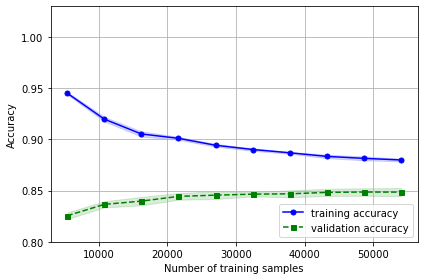

In [144]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_scores, test_scores = learning_curve(estimator=forest, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

起初我在嘗試的時候，我不小心訓練出了一個Overfitting的Model，但Val accuracy跟這個差不多。這說明了這大概就是這個Model的極限了。

#### Testing results

In [145]:
y_pred = forest.predict(X_test)
print('The results of our best model')
print('Missclassified examples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

The results of our best model
Missclassified examples: 1520
Accuracy: 0.848


Random forest約有84.8%左右的準確率，並不到非常可靠的Model，但我原本以為會超級爛，這樣看起來似乎也還好。Random Forest Training時間其實很快，以傳統Machine Learning演算法來說這樣的結果是非常令人滿意的。

### Try SGD with linear SVM
由於資料量非常大，且Feature數非常多高達700多個維度，使用傳統Gradient descent會需要非常多的時間，然而我又不想做PCA或LDA這樣的處理，可能會拉低準確率，畢竟圖片這樣的都西很難說哪些Pixel不重要，使用SGD之後Grid search以及Corss validation都能有不錯的速度以及效果。

In [146]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

pipe_sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=20, tol=1e-3, learning_rate='optimal', n_jobs=-1))

param_range = [0.001, 0.0001, 0.002, 0.01, 0.99, 1.0, 0.9, 0.00001, 0.000001]
#param_range = [0.001, 0.0001, 0.01, 0.99]
param_grid = [{'sgdclassifier__alpha': param_range, 'sgdclassifier__loss': ['log']}, {'sgdclassifier__alpha': param_range, 'sgdclassifier__loss': ['hinge']}]



gs = GridSearchCV(estimator=pipe_sgd, param_grid=param_grid, scoring='accuracy', cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
gs = gs.fit(X_train, y_train)
print(gs.best_params_)
clf = gs.best_estimator_

CV accuracy: 0.833 +/- 0.005
{'sgdclassifier__alpha': 0.0001, 'sgdclassifier__loss': 'log'}


#### Learning curve

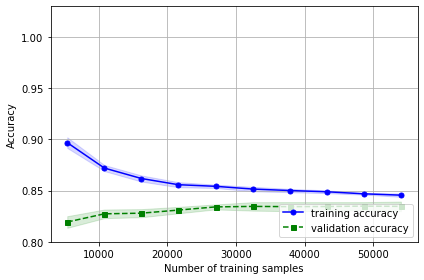

In [147]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=clf, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

#### Testing our final result

In [148]:
clf.fit(X_train, y_train)
y1_pred = clf.predict(X_test)
print('The testing results of our best model')
print('Missclassified examples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

The testing results of our best model
Missclassified examples: 1520
Accuracy: 0.848


我們大約得到與Random forest差不多的效果。以General case來說，Random forest以及Linear SVM的複雜度，運算資源差不多，在這個Task之下效能也差不多，85%左右的準確率即可能是傳統Mahine learning的極限，當然我們這邊沒有考慮非線性的方式，但這給了我們一個理由去嘗試Convolution或MLP這類的網路。

## CNN and MLP networks

### Data preprocess for CNN and MLP
在這裡我們因為在Convolution的Optimizer選擇Adam，它對於資料的範圍非常敏感，因此我們必須將資料的維度全部壓到0跟1之間。

In [149]:
# Make the training set between 0 to 1 to make optimizer stable
X_train = np.array(train_df.iloc[:,1:]) / 255
y_train = np.array(train_df.iloc[:,0])
# same here
X_test = np.array(test_df.iloc[:,1:]) / 255
y_test = np.array(test_df.iloc[:,0])

#### Split X_train into training set and validation set
為我們Training做額外的Validation set。現在使用CNN的人比較少使用Cross validation，因為處理圖片資料量非常龐大，我們通常會使用人家Fine tune好的Model來使用。如果真的需要做Tuning，我的電腦算力也不夠，時間太久，我在這裡就不做Hyperparameter的Tuning。在這裡我選擇Validation set僅拿來做檢查Model Overfitting檢驗。

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_val ,y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0, stratify=y_train)
print('size of our training set:', X_train.shape[0])
print('size of our validation set:', X_val.shape[0])

size of our training set: 48000
size of our validation set: 12000


#### Format the data to fit CNN architecture

In [151]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

X_train = X_train.reshape(X_train.shape[0],*image_shape)
X_test = X_test.reshape(X_test.shape[0],*image_shape)
X_val = X_val.reshape(X_val.shape[0],*image_shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


### Test gpu availability
測試一下硬體。

In [152]:
print('TensorFlow version:', tf.__version__)
np.set_printoptions(precision=3)

TensorFlow version: 2.2.0


In [153]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15187357706992411624
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 11825487706711526404
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3872391168
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11239986728424354083
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 1921829217727363180
physical_device_desc: "device: XLA_GPU device"
]


True

### Two layer MLP
從最簡單的network開始，在逐步增加複雜度。

In [154]:
two_layer_mlp = tf.keras.Sequential([
    tf.keras.layers.Dense(32, name='fc1', activation='relu', input_shape=image_shape),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, name='fc2', activation='softmax'),
])
two_layer_mlp.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 28, 28, 32)        64        
_________________________________________________________________
dropout_50 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 25088)             0         
_________________________________________________________________
fc2 (Dense)                  (None, 16)                401424    
Total params: 401,488
Trainable params: 401,488
Non-trainable params: 0
_________________________________________________________________


#### Compile the model
我們使用Adam來做學習。

In [155]:
from tensorflow.keras.optimizers import Adam
two_layer_mlp.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
print("Compiled finished!")

Compiled finished!


#### Train the two layer MLP

In [156]:
history = two_layer_mlp.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=50,
    verbose=1,
    validation_data=(X_val,y_val),
)

Epoch 1/50
47/47 [==============================] - 2s 49ms/step - loss: 1.0593 - accuracy: 0.6807 - val_loss: 0.6674 - val_accuracy: 0.7725
Epoch 2/50
47/47 [==============================] - 2s 47ms/step - loss: 0.5945 - accuracy: 0.7951 - val_loss: 0.5559 - val_accuracy: 0.8086
Epoch 3/50
47/47 [==============================] - 2s 47ms/step - loss: 0.5296 - accuracy: 0.8172 - val_loss: 0.5173 - val_accuracy: 0.8186
Epoch 4/50
47/47 [==============================] - 2s 47ms/step - loss: 0.4935 - accuracy: 0.8281 - val_loss: 0.4850 - val_accuracy: 0.8327
Epoch 5/50
47/47 [==============================] - 2s 47ms/step - loss: 0.4712 - accuracy: 0.8371 - val_loss: 0.4780 - val_accuracy: 0.8329
Epoch 6/50
47/47 [==============================] - 2s 47ms/step - loss: 0.4617 - accuracy: 0.8386 - val_loss: 0.4594 - val_accuracy: 0.8389
Epoch 7/50
47/47 [==============================] - 2s 47ms/step - loss: 0.4497 - accuracy: 0.8438 - val_loss: 0.4542 - val_accuracy: 0.8393
Epoch 8/50
47

#### Loss curve

Text(0.5, 1.0, 'Train - Accuracy')

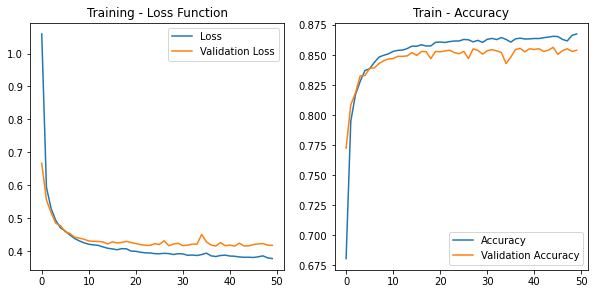

In [157]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

Model稍微有點Overfitting，我們其實可以加上一點Dropout來降低這個狀況，然而我們最關注的Validation accuracy大約就在85%左右，因此即使我們解決了Overfitting的狀況，我們也所得到的準確率也無法超越SVM或Random forest的效能太多。

#### Testing

In [158]:
score = two_layer_mlp.evaluate(X_test, y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.4169
Test Accuracy : 0.8587


我們可以發現，Testing的時候其實只有比SVM以及Random forest高約0.5個百分點，原因可能是因為Perceptron也屬於線性分類器，期效果稍微比SVM差一些些，但如果疊了兩層可能就會稍微跟SVM差不多。

#### Generate classification report for our model

In [159]:
#Get the predictions for the test data
predicted_classes = two_layer_mlp.predict_classes(X_test)
#Get the indices to be plotted
y_true = y_test
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.79      0.84      0.81      1000
     Class 1       0.96      0.98      0.97      1000
     Class 2       0.82      0.72      0.77      1000
     Class 3       0.90      0.86      0.88      1000
     Class 4       0.77      0.83      0.80      1000
     Class 5       0.94      0.92      0.93      1000
     Class 6       0.63      0.63      0.63      1000
     Class 7       0.90      0.93      0.91      1000
     Class 8       0.95      0.94      0.95      1000
     Class 9       0.93      0.94      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [160]:
for y, cls in enumerate(class_names):
    print(y, cls)

0 T_shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


將所有Precision以及f1 score印製出來之後，我們可以發現我們針對Class 0, 2, 4, 6表現不好，這件事情我們在前面就有提到，T-shirt, shirt, pullover, skirt這幾個長的實在是很像，連人都可能認錯，但這樣的成績可能仍然低於人類，也就是說我們應該有向上改進的空間。另外值得注意的一點，關於鞋子方面的分類我們Model倒是表現的很好，這點挺令人意外。

#### Visualize pictures our model classified correct and wrong

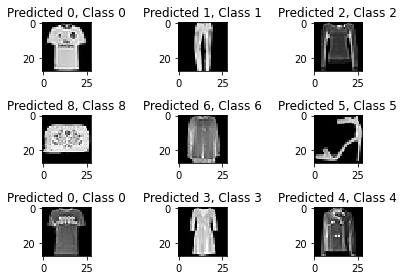

In [161]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

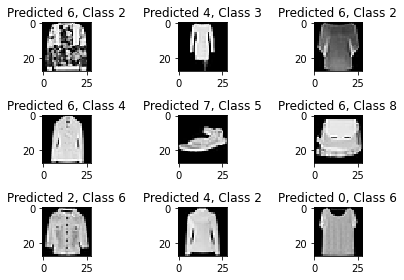

In [162]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

將錯誤的圖片隨機抽樣，這邊就很明顯，衣服類別的佔大多數，但由於這是最簡單的Model，有些其實以人類來說好分辨，所以我很好奇後面Model逐漸增強的結果如何。

### multi-layer MLP
我們直覺認為越多層理論上效果應該越好，我們試試看是否有這樣的趨勢。在這裡我們疊了四層，我認為這應該就是上限了，再增加更多可能會耗費過大的運算資源卻沒有得到成正比的準確率提昇，也或者可能會造成Gradient消失的問題。

In [166]:
multi_layer_mlp = tf.keras.Sequential([
    tf.keras.layers.Dense(32, name='fc1', activation='relu', input_shape=image_shape),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, name='fc2', activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, name='fc3', activation='relu'),
    tf.keras.layers.Dense(16, name='fc4', activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, name='fc5', activation='softmax')
])
multi_layer_mlp.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 28, 28, 32)        64        
_________________________________________________________________
dropout_54 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
fc2 (Dense)                  (None, 28, 28, 32)        1056      
_________________________________________________________________
dropout_55 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
fc3 (Dense)                  (None, 28, 28, 16)        528       
_________________________________________________________________
fc4 (Dense)                  (None, 28, 28, 16)        272       
_________________________________________________________________
dropout_56 (Dropout)         (None, 28, 28, 16)      

為了降低Parameter的數量，我將每層的Neuron數量降低，希望不讓它產生太大的運算負擔，可以發現我們Neuron總共的Parameter數量比剛剛還要少，看看他的效能是否有進步。

#### Compile our model

In [167]:
from tensorflow.keras.optimizers import Adam
multi_layer_mlp.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
print("Compiled finished!")

Compiled finished!


In [168]:
history = multi_layer_mlp.fit(
    X_train,
    y_train,
    batch_size=4096,
    epochs=100,
    verbose=1,
    validation_data=(X_val,y_val),
)

Epoch 1/100
12/12 [==============================] - 7s 551ms/step - loss: 2.2543 - accuracy: 0.2711 - val_loss: 1.7449 - val_accuracy: 0.5842
Epoch 2/100
12/12 [==============================] - 7s 543ms/step - loss: 1.3114 - accuracy: 0.6615 - val_loss: 0.9497 - val_accuracy: 0.7268
Epoch 3/100
12/12 [==============================] - 7s 543ms/step - loss: 0.7784 - accuracy: 0.7431 - val_loss: 0.6839 - val_accuracy: 0.7592
Epoch 4/100
12/12 [==============================] - 7s 544ms/step - loss: 0.6408 - accuracy: 0.7735 - val_loss: 0.5978 - val_accuracy: 0.7933
Epoch 5/100
12/12 [==============================] - 7s 544ms/step - loss: 0.5731 - accuracy: 0.7994 - val_loss: 0.5371 - val_accuracy: 0.8155
Epoch 6/100
12/12 [==============================] - 7s 545ms/step - loss: 0.5210 - accuracy: 0.8164 - val_loss: 0.4980 - val_accuracy: 0.8298
Epoch 7/100
12/12 [==============================] - 7s 544ms/step - loss: 0.4896 - accuracy: 0.8273 - val_loss: 0.4705 - val_accuracy: 0.8402

Text(0.5, 1.0, 'Train - Accuracy')

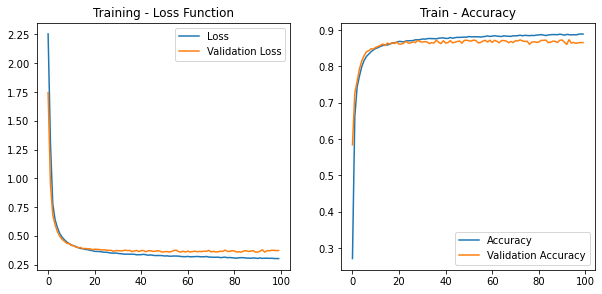

In [169]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [170]:
score = multi_layer_mlp.evaluate(X_test, y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.3655
Test Accuracy : 0.8690


Test accuracy跟僅兩層的MLP相差約莫1.5個百分點，我們有刻意降低Parameter數量，維持輕量一點點的運算，然後加深看起來對分變得工作起到不錯的效果。然而我認為這應該已經接近深度的極限，再深可能會有Gradient Vanishing的問題導致Model的收斂程度大幅提高，如果是這樣的話我們使用Training的時間變長，反而賠了運算時間，得不償失。

In [171]:
#Get the predictions for the test data
predicted_classes = multi_layer_mlp.predict_classes(X_test)
#Get the indices to be plotted
y_true = y_test
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.82      0.82      1000
     Class 1       0.99      0.96      0.97      1000
     Class 2       0.73      0.84      0.78      1000
     Class 3       0.87      0.91      0.89      1000
     Class 4       0.86      0.67      0.75      1000
     Class 5       0.96      0.96      0.96      1000
     Class 6       0.64      0.68      0.66      1000
     Class 7       0.93      0.96      0.94      1000
     Class 8       0.98      0.94      0.96      1000
     Class 9       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [172]:
for y, cls in enumerate(class_names):
    print(y, cls)

0 T_shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


我們仍然可以發現特定幾個Class的表現特別差。

#### Print out correct and wrong classes

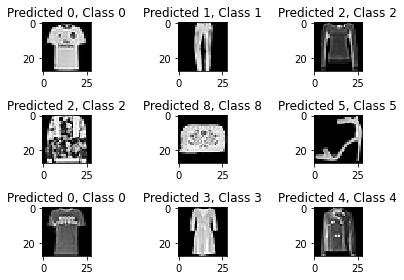

In [173]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

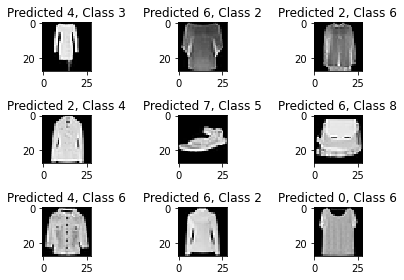

In [174]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

在稍微提昇準確率之後，我們做隨機抽樣，可以發現。只有中間那個長的像衣服的包包弄錯，其他幾乎都跟衣服有關，也顯示我們Model有在進步。在所有近年來我們發現CNN的效果能夠有效超越傳統Machine learning的方法，我們將之引用來看看他在這個Task表現。

### Try Simple CNN Network
僅有一層CNN搭配Maxpool來增加一些些複雜度，並使用Dropout來解決潛在Overfitting的問題。到後面我會使用比較深的神經網路，我基本上也是使用這樣的架構，只是到後面幾層我會加上Batch normalization來幫助Gradient flow。

In [175]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(), # flatten out the layers
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')  
])
cnn_model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                173088    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_______________________________________________

#### Compile the model

In [176]:
from tensorflow.keras.optimizers import Adam
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [177]:
history = cnn_model.fit(
    X_train,
    y_train,
    batch_size=4096,
    epochs=100,
    verbose=1,
    validation_data=(X_val,y_val),
)

Epoch 1/100
12/12 [==============================] - 1s 124ms/step - loss: 1.6699 - accuracy: 0.4670 - val_loss: 1.0522 - val_accuracy: 0.6982
Epoch 2/100
12/12 [==============================] - 1s 96ms/step - loss: 0.8365 - accuracy: 0.7296 - val_loss: 0.6872 - val_accuracy: 0.7631
Epoch 3/100
12/12 [==============================] - 1s 96ms/step - loss: 0.6291 - accuracy: 0.7800 - val_loss: 0.5817 - val_accuracy: 0.7931
Epoch 4/100
12/12 [==============================] - 1s 95ms/step - loss: 0.5548 - accuracy: 0.8041 - val_loss: 0.5223 - val_accuracy: 0.8150
Epoch 5/100
12/12 [==============================] - 1s 95ms/step - loss: 0.5072 - accuracy: 0.8235 - val_loss: 0.4839 - val_accuracy: 0.8307
Epoch 6/100
12/12 [==============================] - 1s 96ms/step - loss: 0.4766 - accuracy: 0.8342 - val_loss: 0.4627 - val_accuracy: 0.8369
Epoch 7/100
12/12 [==============================] - 1s 96ms/step - loss: 0.4545 - accuracy: 0.8409 - val_loss: 0.4359 - val_accuracy: 0.8494
Epoch

Text(0.5, 1.0, 'Train - Accuracy')

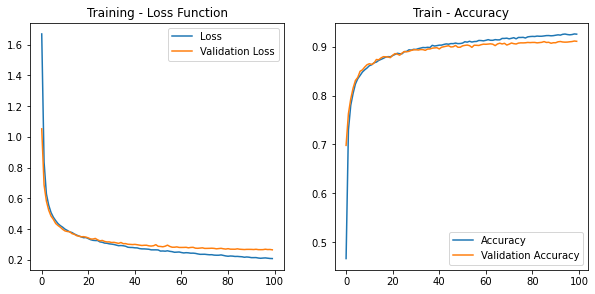

In [178]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

#### Test results

In [179]:
score = cnn_model.evaluate(X_test, y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2427
Test Accuracy : 0.9142


一個簡單的CNN就達到了91%左右的Test accuracy，直接Outperform前面超多層的MLP約莫五個百分點，看來CNN的強度不容小看。既然用更少的資源創造更大的效益，那看來CNN更適合辨識圖片這個Task。

#### Reports

In [180]:
#Get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)
#Get the indices to be plotted
y_true = y_test
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

SyntaxError: invalid syntax (<ipython-input-180-466db563eee3>, line 7)

In [89]:
for y, cls in enumerate(class_names):
    print(y, cls)

0 T_shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


從這邊我們就可以發現除了Class 6(shirt）表現仍然相對弱勢，但我認為Shirt應該是所有Class中最難做對的，且其他的Class的表現都有不小的提昇，我們將其中的其中作對的跟做錯的印出來看看。

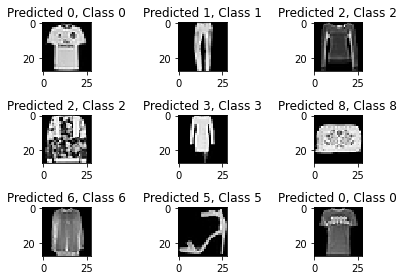

In [55]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

我們可以發現很多剛剛分錯的現在都分對了!

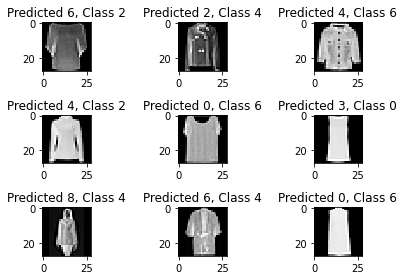

In [56]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

In [90]:
for y, cls in enumerate(class_names):
    print(y, cls)

0 T_shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


我們可以發現認錯的全部變成了衣服的Class，左下角那張圖片，可能是因為上面的鉤鉤讓電腦判斷錯誤，即使是人看第一眼感覺都會認錯，另外右下角也是，幾乎看不出來是什麼，右上角分辨錯誤感覺也相當情有可原，長的根本就是Coat的樣子嘛！

### Train a larger CNN
我們希望套用前面的經驗，更大的神經網路究竟可不可以讓準確率上升呢？這次我們試試看兩層

In [105]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape = image_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    tf.keras.layers.Flatten(), # flatten out the layers
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')  
])
cnn_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
dropout_36 (Dropout)         (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 32)        

我們將Filter的數量往上增加，看看是否可以拉昇準確率。另外為了防止我們Gradient消失，我們將Batchnorm放進我們的Model，除了可以防止消失，也可以加速Model收斂的速度。

In [106]:
from tensorflow.keras.optimizers import Adam
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
print("Compiled finished!")

Compiled finished!


In [107]:
history = cnn_model.fit(
    X_train,
    y_train,
    batch_size=4096,
    epochs=100,
    verbose=1,
    validation_data=(X_val,y_val),
)

Epoch 1/100
12/12 [==============================] - 3s 249ms/step - loss: 1.8774 - accuracy: 0.3344 - val_loss: 2.1796 - val_accuracy: 0.4593
Epoch 2/100
12/12 [==============================] - 3s 217ms/step - loss: 1.2182 - accuracy: 0.5784 - val_loss: 2.0341 - val_accuracy: 0.5725
Epoch 3/100
12/12 [==============================] - 3s 217ms/step - loss: 0.9441 - accuracy: 0.6672 - val_loss: 1.9383 - val_accuracy: 0.6735
Epoch 4/100
12/12 [==============================] - 3s 218ms/step - loss: 0.7730 - accuracy: 0.7283 - val_loss: 1.8398 - val_accuracy: 0.7186
Epoch 5/100
12/12 [==============================] - 3s 219ms/step - loss: 0.6348 - accuracy: 0.7778 - val_loss: 1.7462 - val_accuracy: 0.7363
Epoch 6/100
12/12 [==============================] - 3s 217ms/step - loss: 0.5538 - accuracy: 0.8009 - val_loss: 1.6774 - val_accuracy: 0.7592
Epoch 7/100
12/12 [==============================] - 3s 218ms/step - loss: 0.5032 - accuracy: 0.8177 - val_loss: 1.6441 - val_accuracy: 0.7853

Text(0.5, 1.0, 'Train - Accuracy')

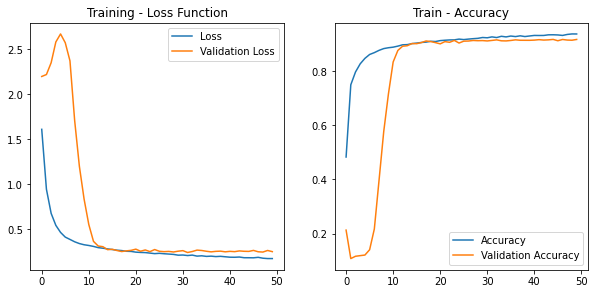

In [120]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

Val acc已經Platoe，似乎已經到了這個架構個極限了。

In [121]:
score = cnn_model.evaluate(X_test, y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2304
Test Accuracy : 0.9180


比僅用一層上升了大約0.3個百分點，顯示層數仍然跟準確率有正比關係。

#### Generate the report

In [62]:
#Get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)
#Get the indices to be plotted
y_true = y_test
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.89      0.85      0.87      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.91      0.83      0.87      1000
     Class 3       0.91      0.93      0.92      1000
     Class 4       0.84      0.90      0.87      1000
     Class 5       0.98      0.97      0.98      1000
     Class 6       0.76      0.80      0.78      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.96      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Shirt（Class 6）仍然表現較差，不過我覺得這已經不是演算法的問題了。

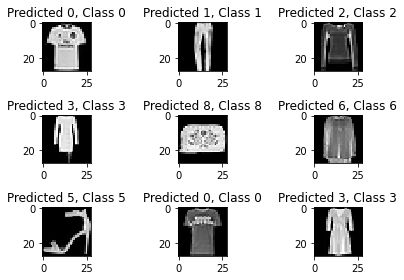

In [63]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

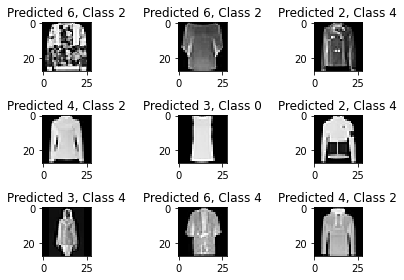

In [64]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

In [111]:
for y, cls in enumerate(class_names):
    print(y, cls)

0 T_shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


我們可以看到，上面認錯的圖片對人來說其實也鄉ㄉ骯困難的。

#### Construct a super deep network
嘗試建造一個更深層的網路，但不要過深，免得有Gradient消失的問題。我們沿用前面Model的架構，基本上前面的Layer做完Convolution之後做Pooling有點像是Down sample的感覺，然後使用Dropout來防止Overfitting，然後在後面的Convolution之後加上Batchnorm讓Gradient活起來，並加入Model收斂的速度。

In [117]:
deep_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape = image_shape),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(), # flatten out the layers
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')  
])
deep_model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 5, 5, 64)          256       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 3, 3, 32)        

In [118]:
from tensorflow.keras.optimizers import Adam
deep_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
print("Compiled finished!")

Compiled finished!


In [119]:
history = deep_model.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=50,
    verbose=1,
    validation_data=(X_val,y_val),
)

Epoch 1/50
47/47 [==============================] - 3s 66ms/step - loss: 1.6093 - accuracy: 0.4828 - val_loss: 2.1970 - val_accuracy: 0.2128
Epoch 2/50
47/47 [==============================] - 3s 63ms/step - loss: 0.9430 - accuracy: 0.7497 - val_loss: 2.2186 - val_accuracy: 0.1077
Epoch 3/50
47/47 [==============================] - 3s 64ms/step - loss: 0.6753 - accuracy: 0.7970 - val_loss: 2.3496 - val_accuracy: 0.1163
Epoch 4/50
47/47 [==============================] - 3s 64ms/step - loss: 0.5417 - accuracy: 0.8271 - val_loss: 2.5806 - val_accuracy: 0.1186
Epoch 5/50
47/47 [==============================] - 3s 64ms/step - loss: 0.4635 - accuracy: 0.8472 - val_loss: 2.6697 - val_accuracy: 0.1208
Epoch 6/50
47/47 [==============================] - 3s 64ms/step - loss: 0.4114 - accuracy: 0.8616 - val_loss: 2.5721 - val_accuracy: 0.1404
Epoch 7/50
47/47 [==============================] - 3s 64ms/step - loss: 0.3855 - accuracy: 0.8684 - val_loss: 2.3706 - val_accuracy: 0.2169
Epoch 8/50
47

Text(0.5, 1.0, 'Train - Accuracy')

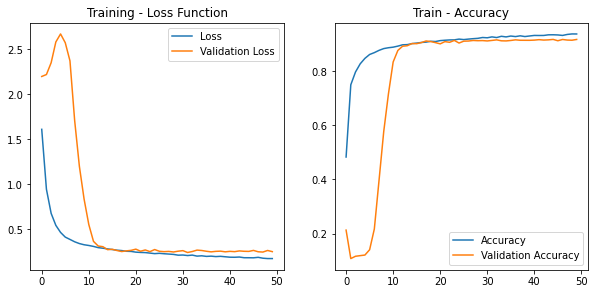

In [122]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [123]:
score = deep_model.evaluate(X_test, y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2233
Test Accuracy : 0.9240


我們可以發現，比起前面準確率提昇了更多，約莫0.8個百分點，或許將Model做的更長可以達到更好的準確率，但相對的耗費的硬體資源就更多，也許前面設計我應該把Filter的數目稍微降低一點。

In [124]:
#Get the predictions for the test data
predicted_classes = deep_model.predict_classes(X_test)
#Get the indices to be plotted
y_true = y_test
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.87      0.88      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.87      0.90      0.88      1000
     Class 3       0.94      0.94      0.94      1000
     Class 4       0.85      0.91      0.88      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.80      0.75      0.77      1000
     Class 7       0.97      0.96      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



我們可以發現，Model針對shrit類的資料表現仍然相對不好，但相對前面已經好很多了。

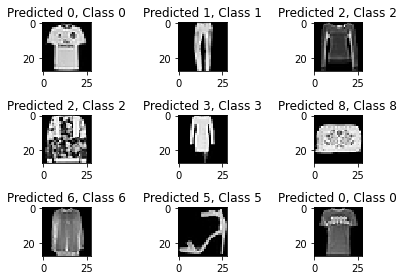

In [125]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

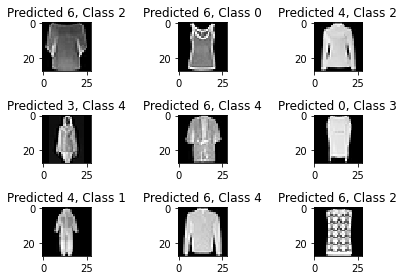

In [126]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

In [127]:
for y, cls in enumerate(class_names):
    print(y, cls)

0 T_shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


如前面所述，這些給人來分辨基本上都很有困難了，某些很有可能甚至是當初Label錯誤的Data。

### Training with augmented data
我們利用剛剛得到的Model，將資料橫向翻轉之後看看能不能夠讓我們準確率上升。注意到我們validation set以及testing set沒有做任何處理。除了翻轉，我們不會做其他的Augmentation，因為這個Dataset為黑白Dataset，角度光線等等皆蠻制式化的，沒有理由做別種的Augmentation。

In [128]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape = image_shape),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(), # flatten out the layers
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')  
])
cnn_model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 5, 5, 64)          256       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 3, 3, 32)        

In [129]:
from tensorflow.keras.optimizers import Adam
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
print("Compiled finished!")

Compiled finished!


In [130]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
datagen.fit(X_train)
history = cnn_model.fit(
    datagen.flow(X_train, y_train, batch_size=256),
    steps_per_epoch=len(X_train) / 256,
    # batch_size=4096,
    epochs=100,
    verbose=1,
    validation_data=(X_val, y_val),
)


Epoch 1/100
188/187 [==============================] - 4s 21ms/step - loss: 1.0157 - accuracy: 0.6575 - val_loss: 2.2233 - val_accuracy: 0.1905
Epoch 2/100
188/187 [==============================] - 4s 19ms/step - loss: 0.5346 - accuracy: 0.8091 - val_loss: 0.9380 - val_accuracy: 0.7072
Epoch 3/100
188/187 [==============================] - 4s 19ms/step - loss: 0.4463 - accuracy: 0.8420 - val_loss: 0.3735 - val_accuracy: 0.8652
Epoch 4/100
188/187 [==============================] - 4s 19ms/step - loss: 0.4013 - accuracy: 0.8567 - val_loss: 0.3243 - val_accuracy: 0.8818
Epoch 5/100
188/187 [==============================] - 4s 19ms/step - loss: 0.3770 - accuracy: 0.8646 - val_loss: 0.3157 - val_accuracy: 0.8835
Epoch 6/100
188/187 [==============================] - 4s 19ms/step - loss: 0.3551 - accuracy: 0.8719 - val_loss: 0.3184 - val_accuracy: 0.8845
Epoch 7/100
188/187 [==============================] - 4s 19ms/step - loss: 0.3415 - accuracy: 0.8780 - val_loss: 0.3190 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

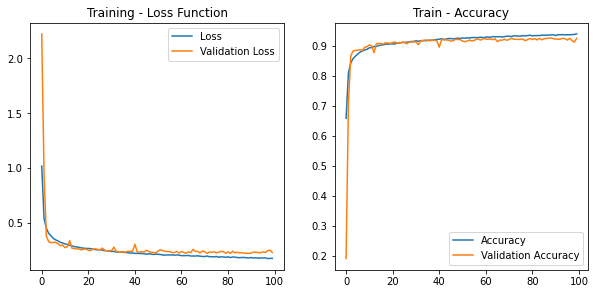

In [133]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [134]:
score = cnn_model.evaluate(X_test, y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2123
Test Accuracy : 0.9264


我們可以發現，似乎做了Augmentation的幫助不大，我認為因為這個Dataset角度皆固定，且沒有光影問題，另外角度也都固定，因此我們做Augmentation對於準確率的幫助不大。

## Summary

1. 關於資料的處理：
    - 我們將資料load進來之後我們可以看到資料量的龐大以及Feature數量也很大，然後Label的分佈很均勻。理所當然的，我們不需要對它做任何Feature encoding，也不需要做Upsample或Down sample。然而Feature很多這件事情，我有考慮過利用PCA或LDA降維度，然而這可能導致準確率下降，我希望我能夠先嘗試過將所有Feature一起列入考慮的演算法，如果效能實在是太差，我才考慮使用PCA LDA來降維度。資料量龐大也象徵著Cross validation的效率變得非常差，也說明了傳統Machine learning algorithms可能在時間的表現上會不好。
2. 關於我Model的選擇
    - 首先是傳統Machine learning的部份，我選擇的是Linear regression SGD以及SVM SGD，還有Random forest，理由是因為他們對於大量資料還是有一定的效率與準確率，Random forest以及SVM再過去作業中幾乎都是表現數一數二的佼佼者，而我會選擇SGD是因為我們資料量實在是太大了，我們無法使用Full batch Training的SVM，起初我有嘗試過但過了四個小時之後還是沒有好，這時SGD就完美的解決了這個問題。最後來說說我不考慮使用的Model，我不考慮使用KNN，第一我們考慮到我們資料量太過龐大，Testing的時候可能會因為電腦記憶體不足，而導致Segmentation fault（我就有遇到），除非去降維度，不然KNN效率級差，但我前面有提到我們不考慮降維度的方法。sgd的部份我有去做Cross validation。
    - 再來是深度的網路，我會考慮使用MLP以及CNN，MLP架構簡單，我就直接拿來用看看，去探討它不同深度的準確率變化。CNN的部份，我也是去探討深度變化，我認為我越深的網路理論上表現要越好。CNN我的架構是，Model前半段，CONV完接上Maxpool，Model後段，CONV完接上BatchNorm防止Gradient消失並加速收斂速度，中間適時加上Dropout降低MOdel的Overfitting，最後接上FC layer來做最終判斷。Layer中間的Activation我一律使用Relu防止Gradient vanish，最後一層FC使用Softmax，把機率拉到0跟1之間。這樣做的理由不外忽就是，因為我不會做一個Skip connection的RESNET，那最陽春而且早期表現最好的VGG net就是利用類似這樣的設計，將準確拉到最大。關於Optimizer的選擇我都使用ADAM，這也是因為現在最強的Classifier也都是選用Adam。CNN的Fine tuning非常吃硬體資源，在資源有限的情況之下，我先暫時使用大家目前一致認同相對有效的參數設定。

3. 關於我的Performance Evaluation
    - 最直接的部份當然就是看Test set最後的準確率高低來代表一個很有說服力的指標。除此之外，我們都要確保我們Learning curve沒有Overfitting的問題，最後挑選Accuracy最高的當作我們最理想的Model。另外，Model究竟把什麼東西給學錯了這件事我也做了很多探討，關於Shirt Class對於Model來說幾乎都學不好，Pullover, t-shirt, skirt也是常見容易稿混的前幾名，但我認為這個Task對人來說也很困難，我們也可以看到很多張Model答錯的圖片我們可能連人都說不上來這是什麼。還有就是效能比較，我們究竟是否為了達到更高的準確率，但要犧牲很多的運算？

4. 我的最終選擇
    如果使用傳統ML方式，Random forest以及SGD SVM或SGD logistic regression會是我的第一選擇，他們經過我的Fine tuning以及Cross validation之後，都有84.8%的準確率，在計算的複雜度上，兩者是接近差不多，Training時Random forest稍微Expensive，畢竟他是Ensemble的演算法，它在Training方面比較吃虧，但好處是Random forest其實不太需要做Cross validation，如果將Cross validation，一起考慮進來，則兩者是非常接近的。
    如果使用Neural network，的方式，我的第一選擇會是super deep convolution neural network，我倒數第二個Training的Model，有92.4個百分點。然而他的Parameter數量遠遠大於第一個Convolution network，但它就已經有91.